<a href="https://colab.research.google.com/github/mohandaz/HIA-303-Project/blob/main/HIA_303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USING GIT HUB


In [41]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [42]:
# URL of the dataset on GitHub
github_raw_url = 'https://raw.githubusercontent.com/mohandaz/HIA-303-Project/main/wdbc.data'

# Fetch data from the URL
response = requests.get(github_raw_url)

if response.status_code == 200:
    # Load breast cancer data from CSV file using Pandas
    bca = pd.read_csv(StringIO(response.text), header=None)

    # Print shape, columns, and the first few rows of the DataFrame
    print(bca.shape)
    print(bca.columns)
    bca.head()
else:
    print(f"Failed to fetch data. Status Code: {response.status_code}")



(569, 32)
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')


In [43]:
# Print shape, columns, and the first few rows of the DataFrame
print(bca.shape)
print(bca.columns)
bca.head()

(569, 32)
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
print(bca.dtypes)


0       int64
1      object
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
dtype: object


In [45]:
# Rename columns
column_names = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

bca.columns = column_names

# Print the updated columns
print(bca.columns)


Index(['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [46]:
# Print the first 20 rows
print(bca.head(20))


          ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   
5     843786         M        12.45         15.70           82.57      477.1   
6     844359         M        18.25         19.98          119.60     1040.0   
7   84458202         M        13.71         20.83           90.20      577.9   
8     844981         M        13.00         21.82           87.50      519.8   
9   84501001         M        12.46         24.04           83.97      475.9   
10    845636         M        16.02         23.24          102.70      797.8   
11  84610002         M        15.78     

In [47]:
# Save the DataFrame to a CSV file in Colab
csv_filename = '/content/breast_cancer_dataset.csv'
bca.to_csv(csv_filename, index=False)


In [48]:
# Check for missing values
missing_values = bca.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [49]:
# Move the 'Diagnosis' column to the last
diagnosis_column = bca.pop('Diagnosis')
bca['Diagnosis'] = diagnosis_column

# Print the updated DataFrame
print(bca.head())


         ID  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60

In [50]:
# Check the number of rows and columns
num_rows, num_columns = bca.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 569
Number of columns: 32


In [51]:
# Add a new column 'ID' with unique values
bca.insert(0, 'PID', range(1, len(bca) + 1))

# Print the updated DataFrame
print(bca.head())


   PID        ID  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    1    842302        17.99         10.38          122.80     1001.0   
1    2    842517        20.57         17.77          132.90     1326.0   
2    3  84300903        19.69         21.25          130.00     1203.0   
3    4  84348301        11.42         20.38           77.58      386.1   
4    5  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.3

In [52]:
# Remove the 'ID' column
bca.drop('ID', axis=1, inplace=True)

# Print the updated DataFrame
print(bca.head())


   PID  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    1        17.99         10.38          122.80     1001.0          0.11840   
1    2        20.57         17.77          132.90     1326.0          0.08474   
2    3        19.69         21.25          130.00     1203.0          0.10960   
3    4        11.42         20.38           77.58      386.1          0.14250   
4    5        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  ...  \
0           0.27760          0.3001              0.14710         0.2419  ...   
1           0.07864          0.0869              0.07017         0.1812  ...   
2           0.15990          0.1974              0.12790         0.2069  ...   
3           0.28390          0.2414              0.10520         0.2597  ...   
4           0.13280          0.1980              0.10430         0.1809  ...   

   texture_worst  perimeter_wors

In [53]:
# Check for duplicate rows
duplicate_rows = bca[bca.duplicated()]

# Print the duplicate rows, if any
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [PID, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst, Diagnosis]
Index: []

[0 rows x 32 columns]


In [54]:
# Check for NaN and missing values
missing_values = bca.isna().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
PID                        0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Diagnosis                  0
dtype: int64


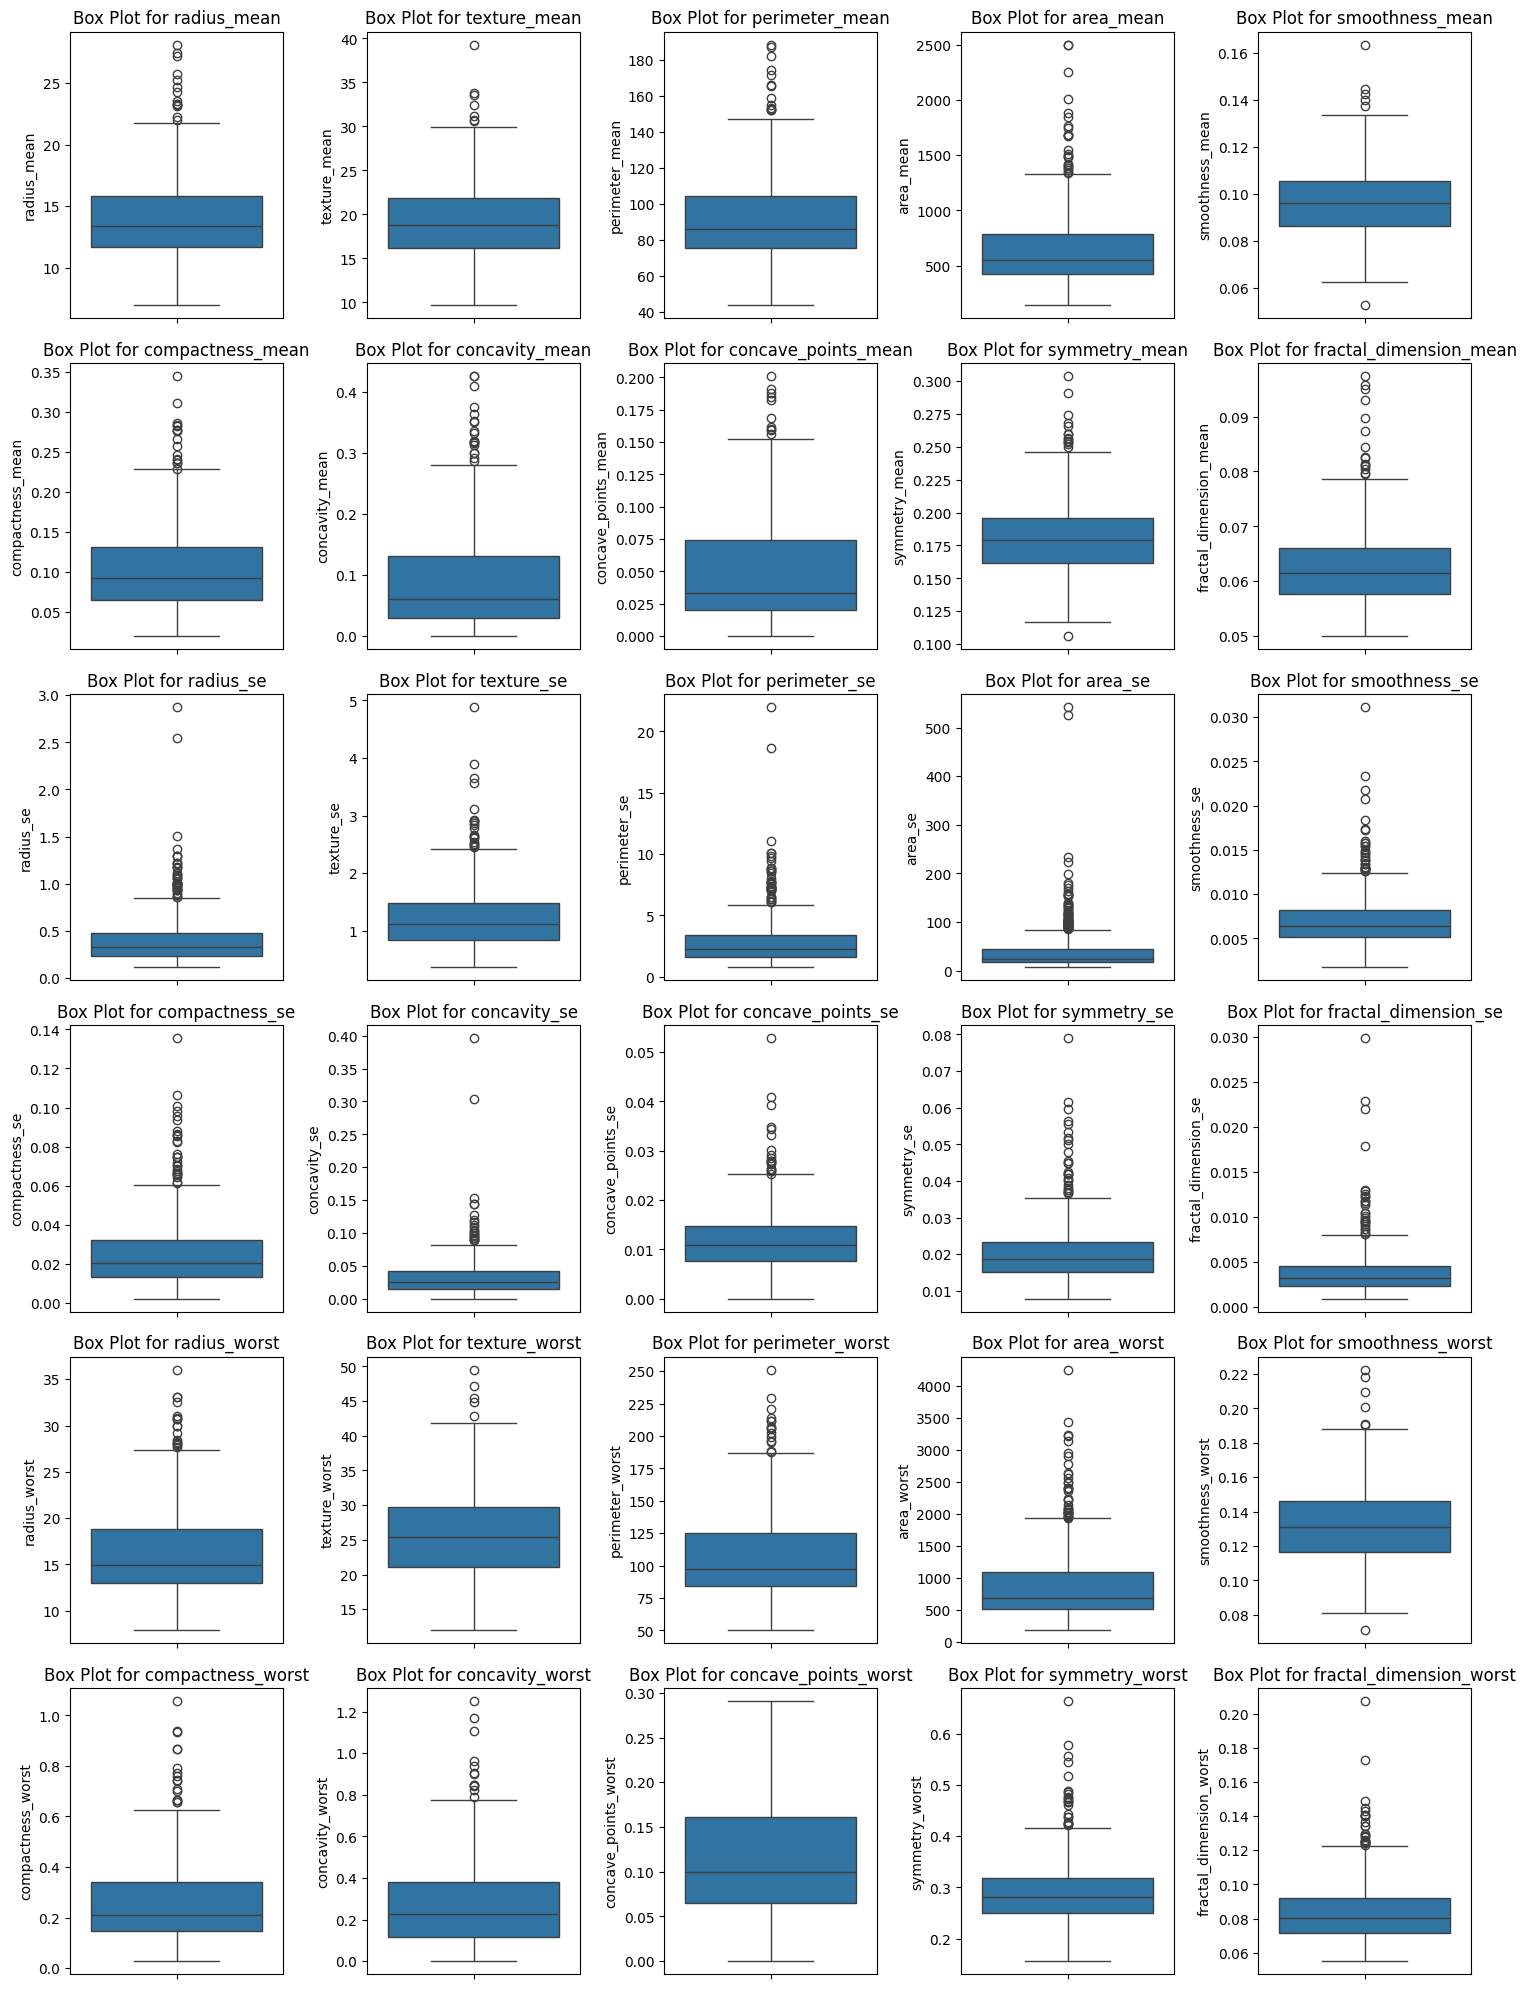

In [55]:
# OUTLIERS
# Selecting all continuous variables for outlier detection
continuous_columns = [ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Create individual horizontal box plots for each continuous variable

plt.figure(figsize=(15, 20))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(y=bca[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


In [56]:
outlier_threshold = 1.5
# Calculate the percentage of outliers for each column
outliers_percentage = ((bca[continuous_columns] < bca[continuous_columns].quantile(0.25) - outlier_threshold * (bca[continuous_columns].quantile(0.75) - bca[continuous_columns].quantile(0.25))) |
                       (bca[continuous_columns] > bca[continuous_columns].quantile(0.75) + outlier_threshold * (bca[continuous_columns].quantile(0.75) - bca[continuous_columns].quantile(0.25)))).mean() * 100

# Print the percentage of outliers for each column
print("Percentage of Outliers for Each Column:")
print(outliers_percentage)


Percentage of Outliers for Each Column:
radius_mean                 2.460457
texture_mean                1.230228
perimeter_mean              2.284710
area_mean                   4.393673
smoothness_mean             1.054482
compactness_mean            2.811951
concavity_mean              3.163445
concave_points_mean         1.757469
symmetry_mean               2.636204
fractal_dimension_mean      2.636204
radius_se                   6.678383
texture_se                  3.514938
perimeter_se                6.678383
area_se                    11.423550
smoothness_se               5.272408
compactness_se              4.920914
concavity_se                3.866432
concave_points_se           3.339192
symmetry_se                 4.745167
fractal_dimension_se        4.920914
radius_worst                2.987698
texture_worst               0.878735
perimeter_worst             2.636204
area_worst                  6.151142
smoothness_worst            1.230228
compactness_worst           2.81195

In [57]:
# Calculate statistics for each continuous variable
statistics = []

for column in continuous_columns:
    q1 = bca[column].quantile(0.25)
    q3 = bca[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr

    min_value = bca[column].min()
    max_value = bca[column].max()

    statistics.append({
        'Variable': column,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Minimum Value': min_value,
        'Maximum Value': max_value
    })

# Create a DataFrame from the list of dictionaries
statistics_df = pd.DataFrame(statistics)

# Print the DataFrame
print(statistics_df)


                   Variable  Lower Bound  Upper Bound  Minimum Value  \
0               radius_mean     5.580000    21.900000       6.981000   
1              texture_mean     7.725000    30.245000       9.710000   
2            perimeter_mean    31.775000   147.495000      43.790000   
3                 area_mean  -123.300000  1326.300000     143.500000   
4           smoothness_mean     0.057975     0.133695       0.052630   
5          compactness_mean    -0.033300     0.228620       0.019380   
6            concavity_mean    -0.122150     0.282410       0.000000   
7       concave_points_mean    -0.060225     0.154535       0.000000   
8             symmetry_mean     0.111200     0.246400       0.106000   
9    fractal_dimension_mean     0.045070     0.078750       0.049960   
10                radius_se    -0.137350     0.848650       0.111500   
11               texture_se    -0.126250     2.434150       0.360200   
12             perimeter_se    -1.020500     5.983500       0.75

In [58]:
# Selecting some continuous variables for normality check
continuous_columns = [ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Kolmogorov–Smirnov test
for column in continuous_columns:
    # Kolmogorov–Smirnov test
    kstest_result = kstest(bca[column], 'norm')
    p_value_formatted = "{:.3f}".format(kstest_result.pvalue)
    print(f'Kolmogorov–Smirnov test for {column}: p-value = {kstest_result.pvalue}')


Kolmogorov–Smirnov test for radius_mean: p-value = 0.0
Kolmogorov–Smirnov test for texture_mean: p-value = 0.0
Kolmogorov–Smirnov test for perimeter_mean: p-value = 0.0
Kolmogorov–Smirnov test for area_mean: p-value = 0.0
Kolmogorov–Smirnov test for smoothness_mean: p-value = 1.5963292620766572e-145
Kolmogorov–Smirnov test for compactness_mean: p-value = 1.824153479421873e-136
Kolmogorov–Smirnov test for concavity_mean: p-value = 4.604431081733901e-132
Kolmogorov–Smirnov test for concave_points_mean: p-value = 4.604431081733901e-132
Kolmogorov–Smirnov test for symmetry_mean: p-value = 8.838623837479726e-159
Kolmogorov–Smirnov test for fractal_dimension_mean: p-value = 1.367007843123519e-143
Kolmogorov–Smirnov test for radius_se: p-value = 1.3755345396639173e-158
Kolmogorov–Smirnov test for texture_se: p-value = 8.637799935726241e-245
Kolmogorov–Smirnov test for perimeter_se: p-value = 0.0
Kolmogorov–Smirnov test for area_se: p-value = 0.0
Kolmogorov–Smirnov test for smoothness_se: p-va

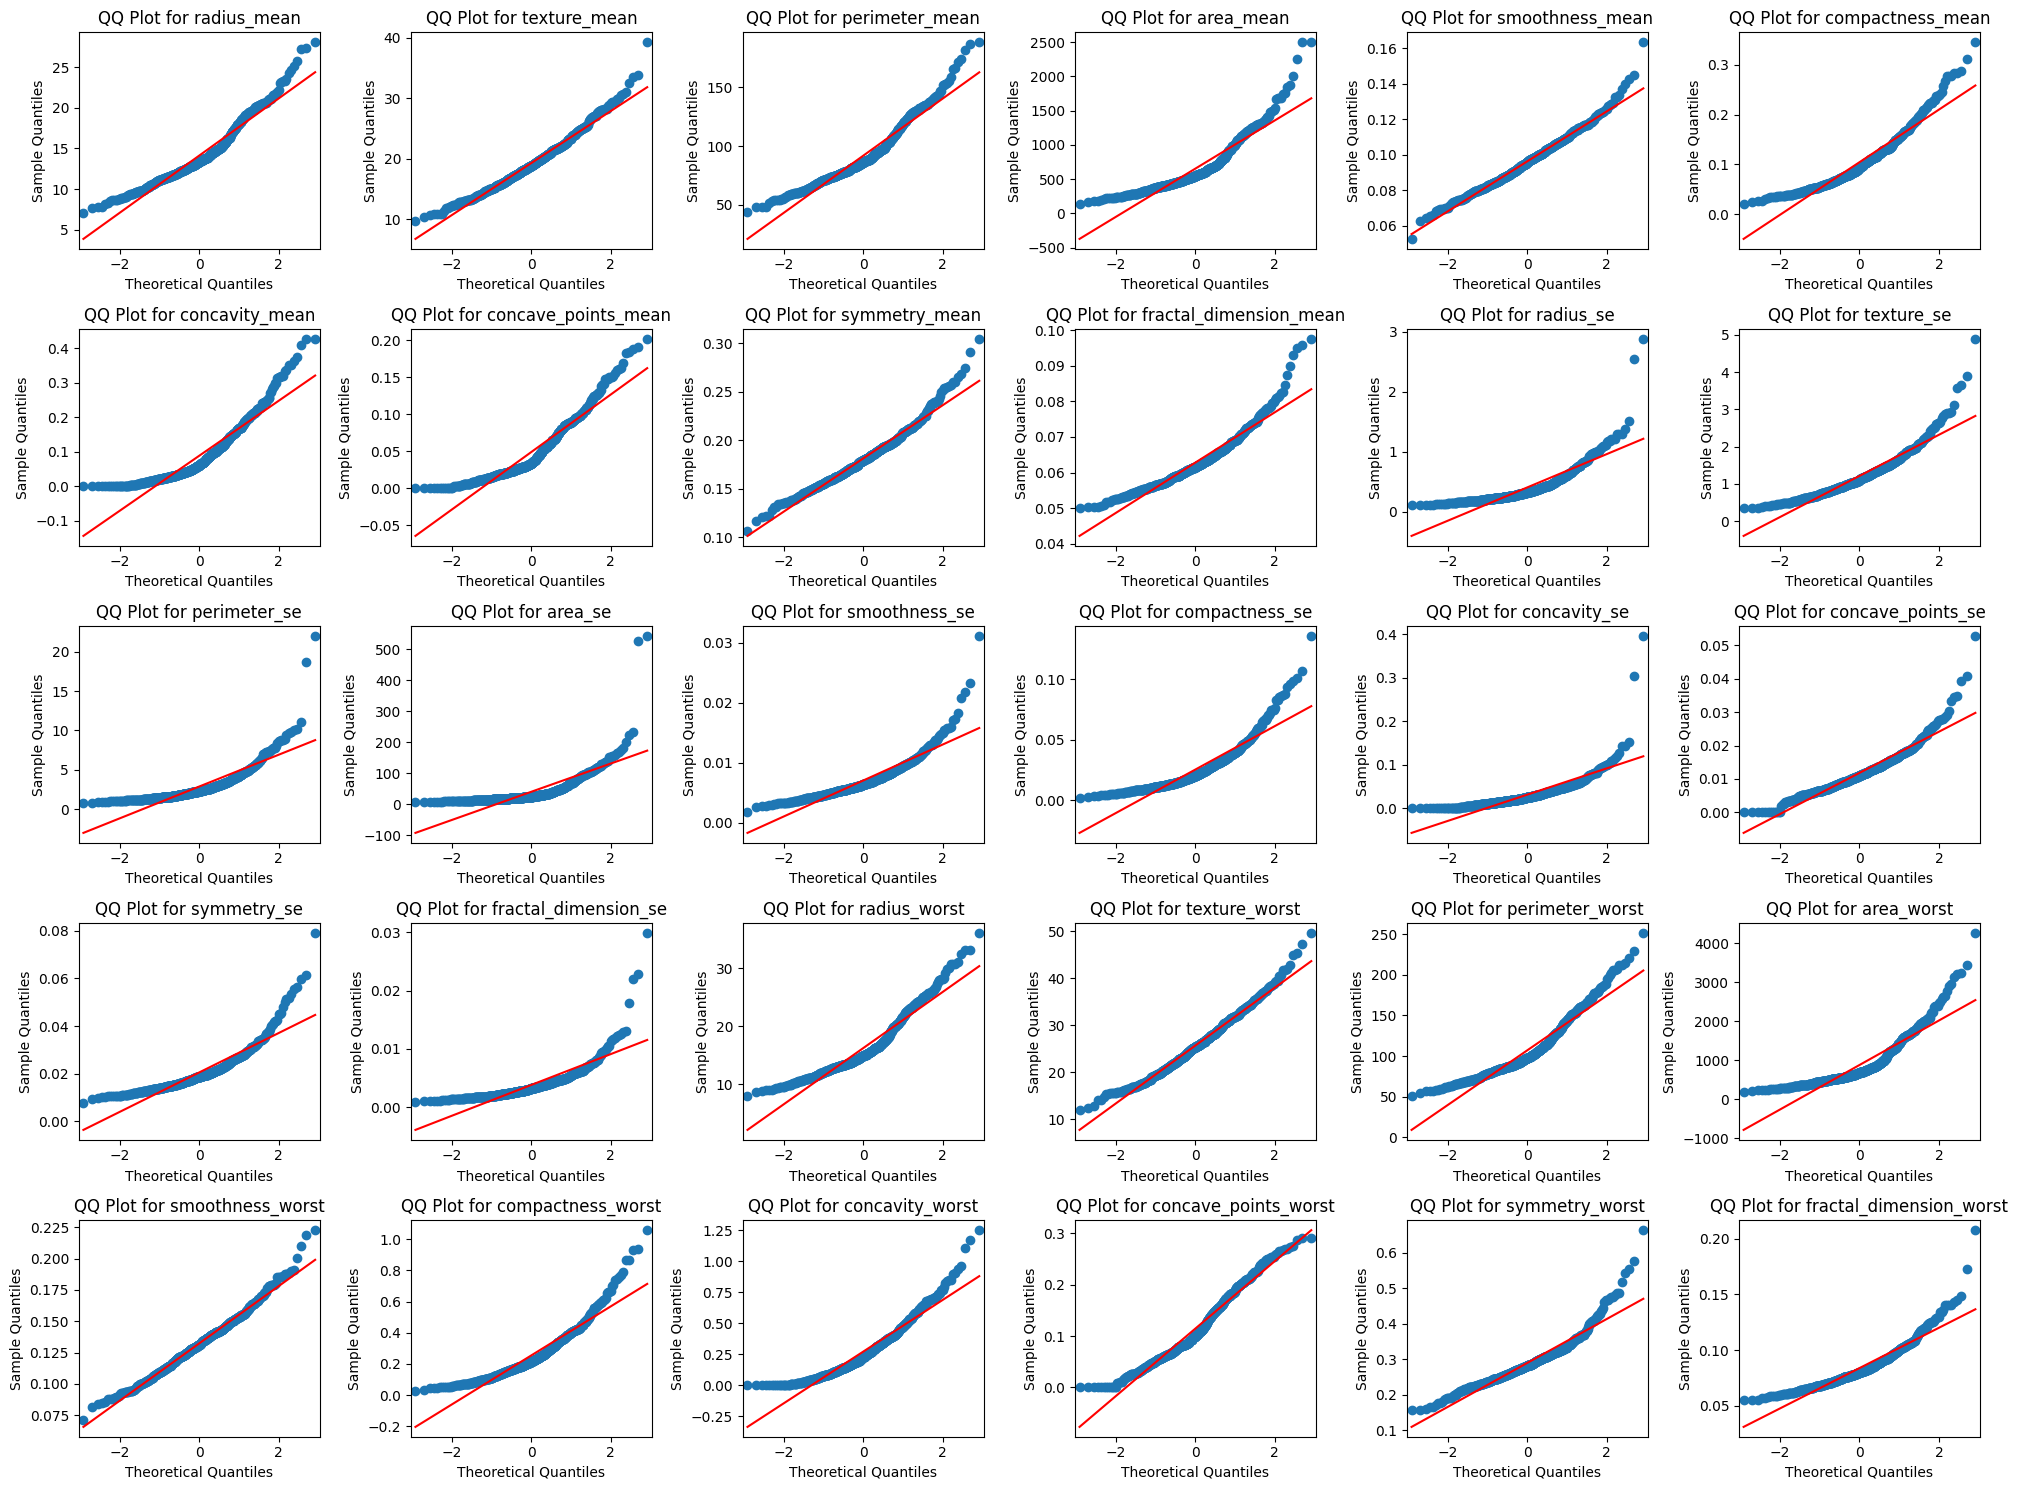

In [59]:
# Check normality using QQ plot
# Combine QQ plots into subplots
num_plots = len(continuous_columns)
num_cols = 6
num_rows = 5

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

for i, column in enumerate(continuous_columns):
    row = i // num_cols
    col = i % num_cols

    # QQ plot
    sm.qqplot(bca[column], line='s', ax=axes[row, col])
    axes[row, col].set_title(f'QQ Plot for {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

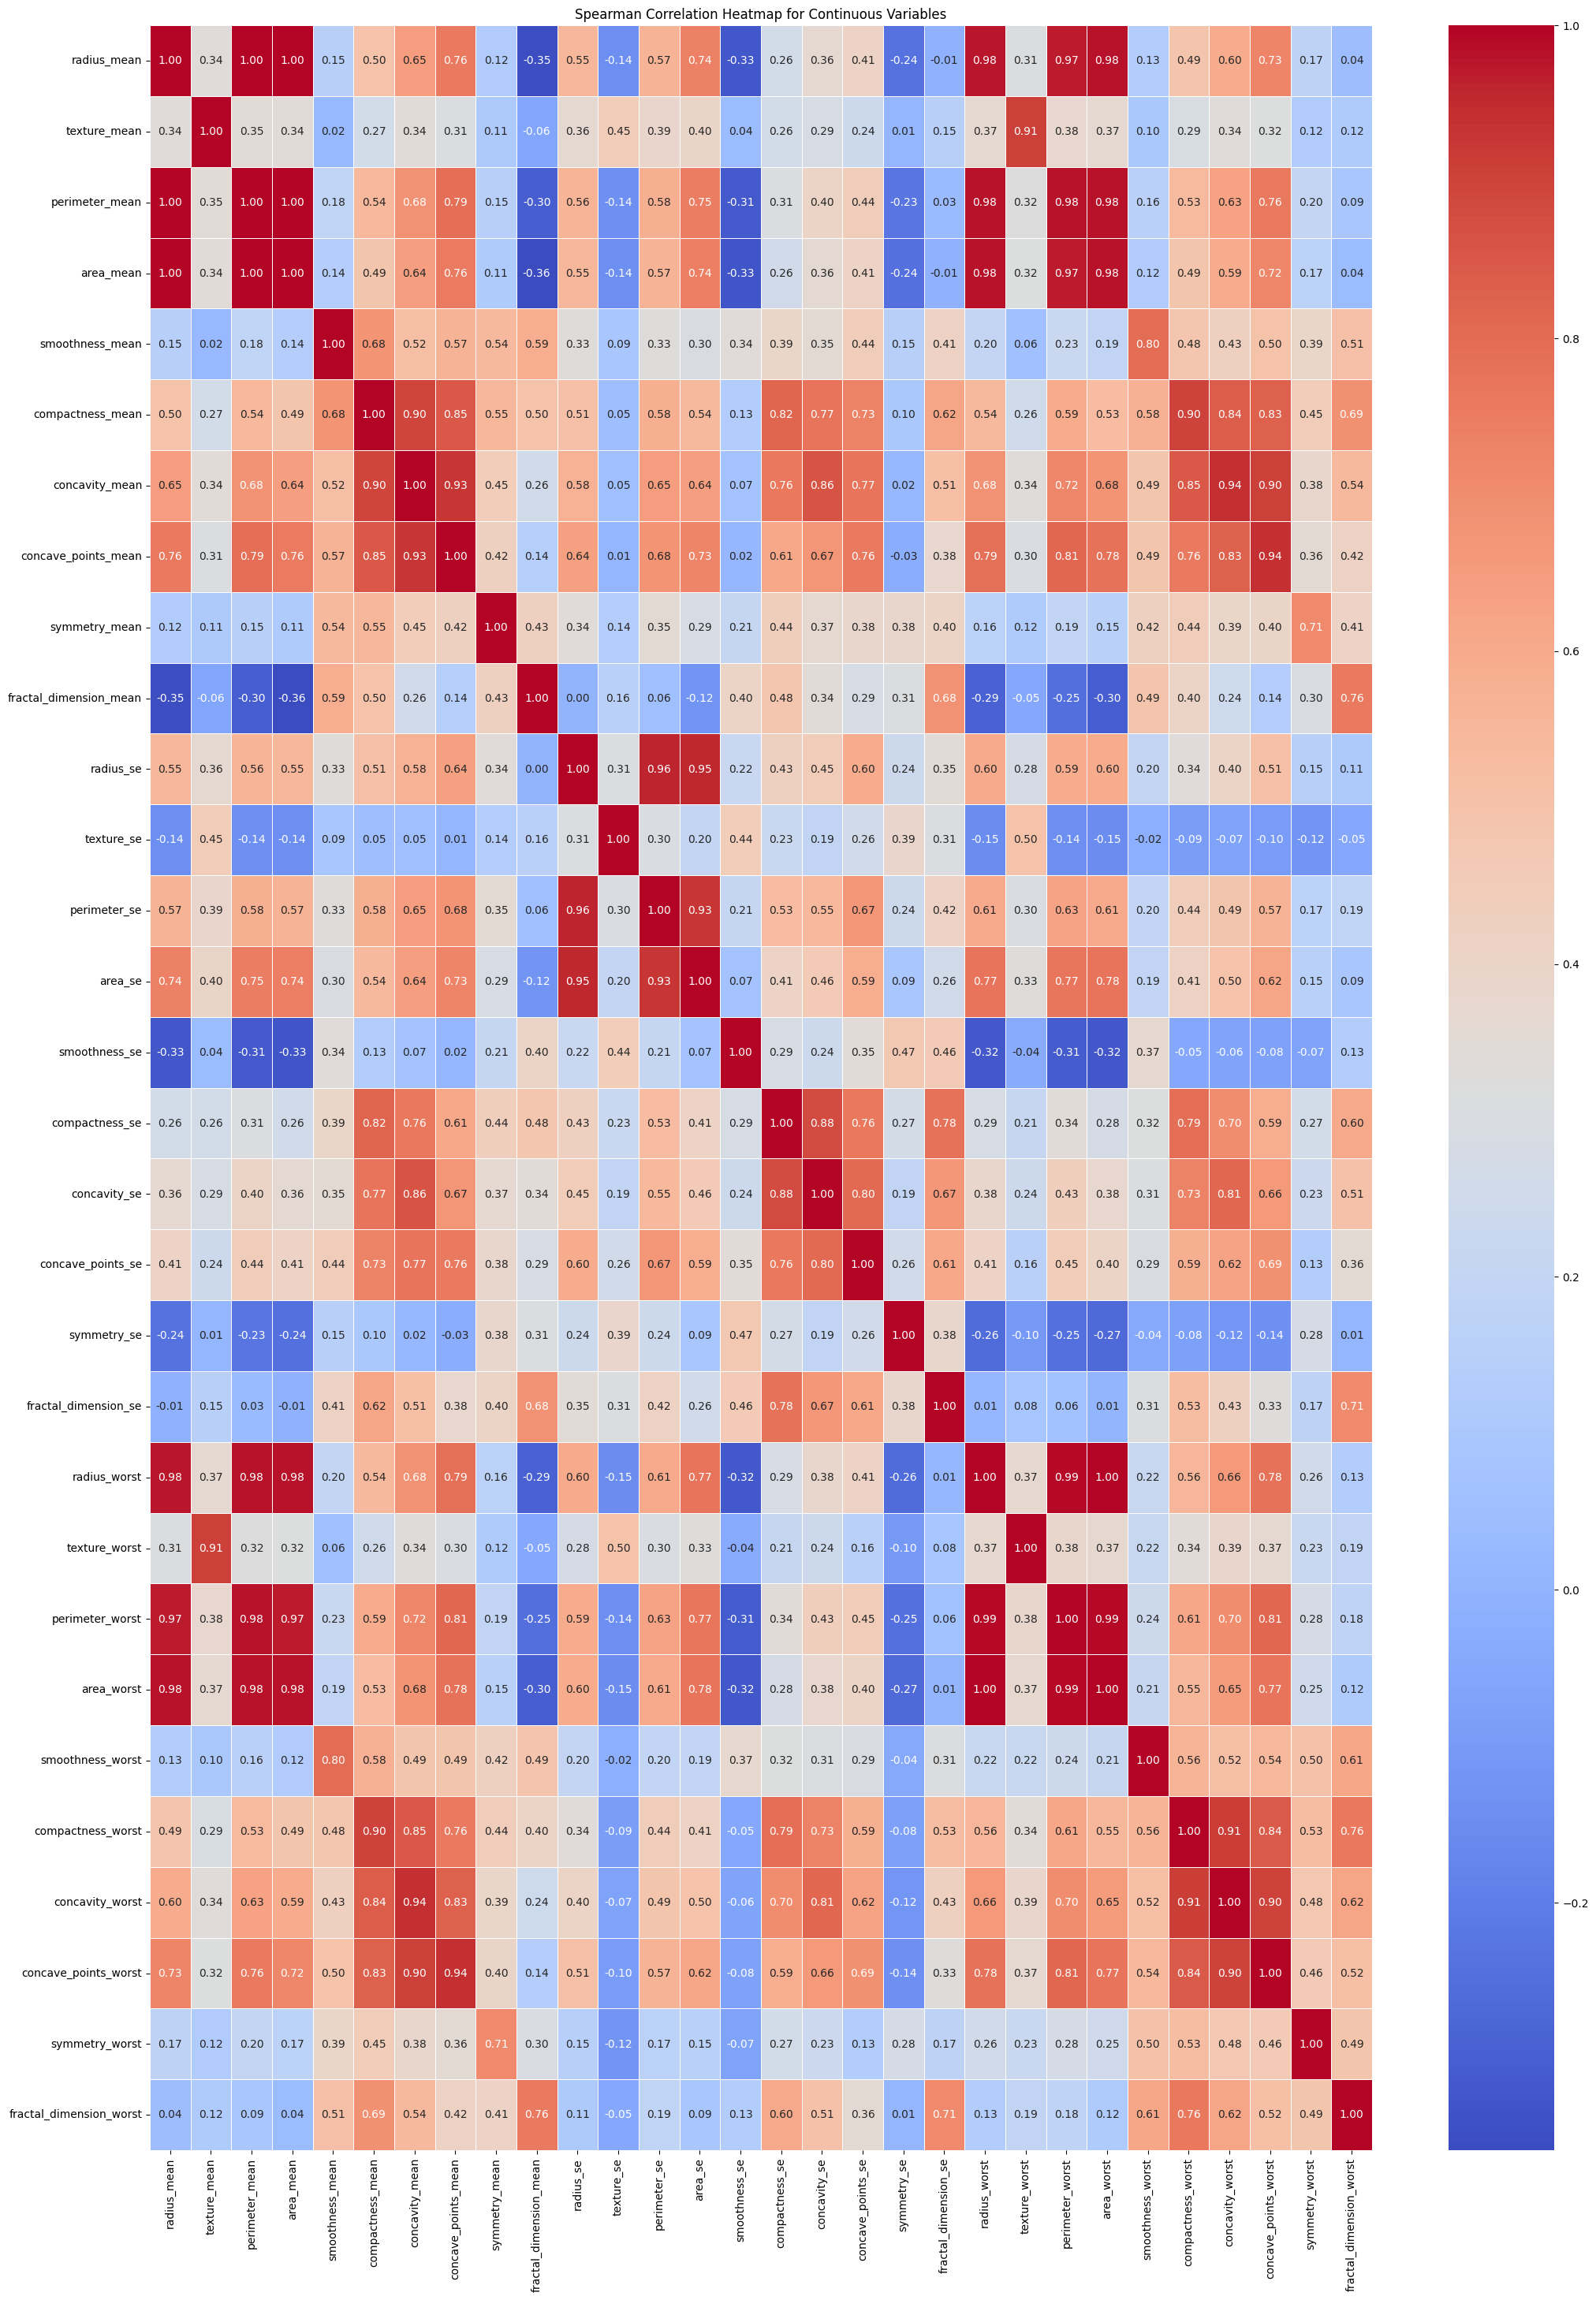

In [60]:
# Selecting continuous variables for multicollinearity check
continuous_columns = [ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Calculate the Spearman correlation matrix
correlation_matrix = bca[continuous_columns].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(25, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap for Continuous Variables')
plt.show()


OUTLIERS CORRECTION

In [61]:
# Create a copy of the original DataFrame
bca_capped = bca.copy()
start_column = 1
end_column = 31

# Iterate over each variable in columns start_column to end_column
for column in bca_capped.columns[start_column:end_column + 1]:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(bca_capped[column]):
        q1 = bca[column].quantile(0.25)
        q3 = bca[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        # Cap values above the upper bound to the upper bound value
        bca_capped[column] = np.clip(bca_capped[column], lower_bound, upper_bound)




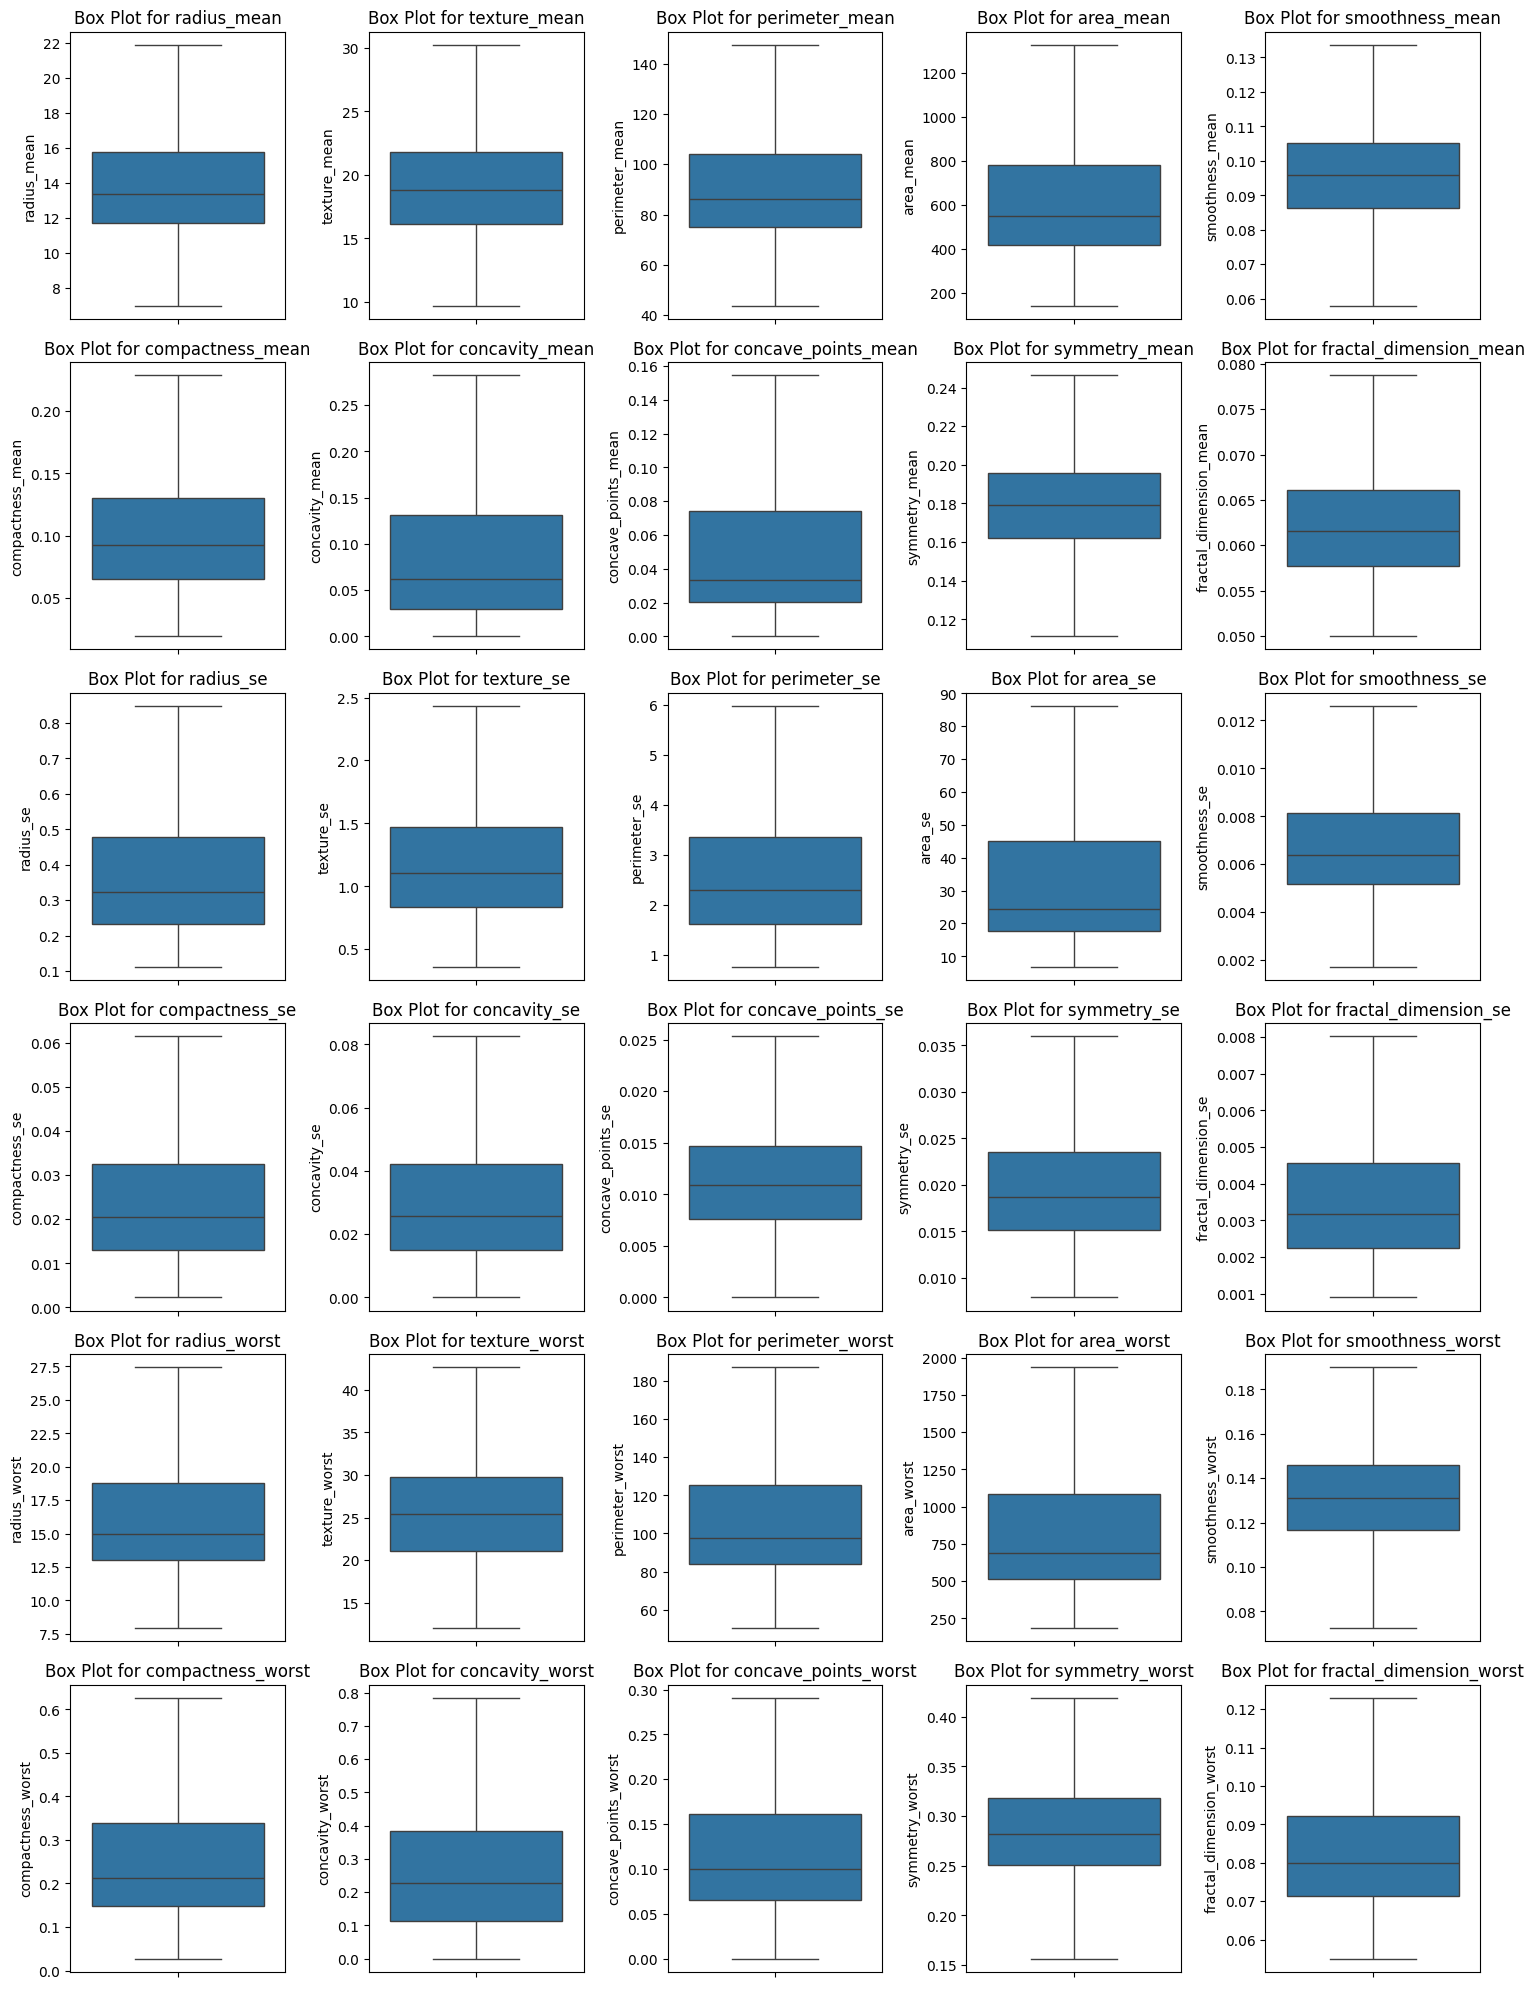

In [62]:
# Data distribution after capping/clipping outliers
plt.figure(figsize=(15, 20))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(y=bca_capped[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


DATA SCALLING

In [63]:
# Create a copy of the DataFrame for feature scaling
bca_capped_scaled = bca_capped.copy()

# Select only the numeric columns for feature scaling
numeric_columns = bca_capped_scaled.select_dtypes(include='number').columns
columns_to_scale = numeric_columns[start_column:end_column + 1]

# Instantiate StandardScaler
scaler = StandardScaler()

# Perform feature scaling on selected columns
bca_capped_scaled[columns_to_scale] = scaler.fit_transform(bca_capped_scaled[columns_to_scale])



In [64]:
print(bca_capped_scaled)

     PID  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      1     1.176800     -2.121200        1.357375   1.184085   
1      2     1.949929     -0.354875        1.795991   2.249396   
2      3     1.686226      0.476899        1.670052   1.846217   
3      4    -0.791983      0.268955       -0.606410  -0.831485   
4      5     1.866023     -1.174698        1.891531   2.154338   
..   ...          ...           ...             ...        ...   
564  565     2.246595      0.749377        2.191180   2.250380   
565  566     1.818077      2.150007        1.722165   2.036334   
566  567     0.760269      2.109375        0.727678   0.715676   
567  568     1.958919      2.408144        2.108668   2.049446   
568  569    -1.888747      1.263260       -1.894466  -1.503778   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0           1.618861          2.541404        2.647422             2.620973   
1          -0.842995         -0.498189       -0.0

ADDRESSING IMBALANCE

Class distribution before oversampling:
B    357
M    212
Name: Diagnosis, dtype: int64
Class distribution after oversampling:
M    357
B    357
Name: Diagnosis, dtype: int64


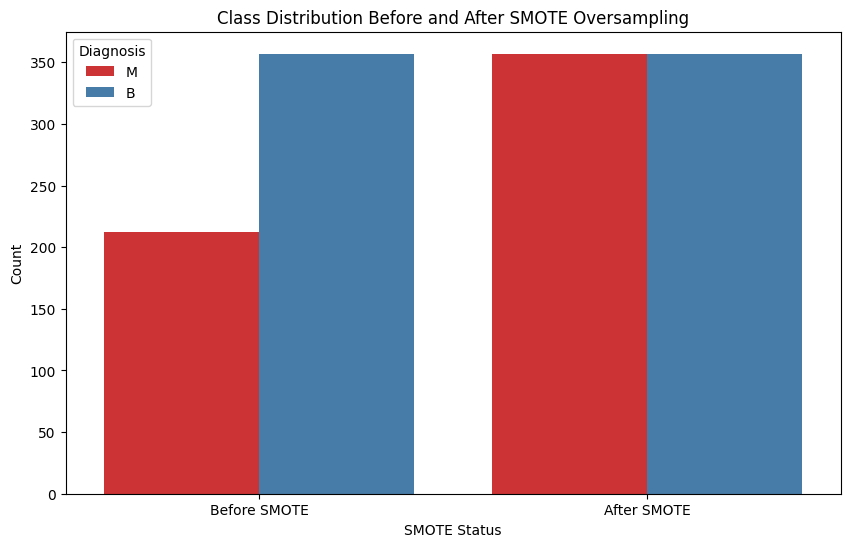

In [66]:
# Separate features and target variable
X = bca_capped_scaled.drop('Diagnosis', axis=1)
y = bca_capped_scaled['Diagnosis']

# SMOTE
smote = SMOTE(random_state=43)

# Fit and apply SMOTE on the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled data into a new DataFrame
bca_capped_scaled_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Diagnosis')], axis=1)

# Display the class distribution after oversampling
print("Class distribution before oversampling:")
print(bca_capped_scaled['Diagnosis'].value_counts())

print("Class distribution after oversampling:")
print(bca_capped_scaled_balanced['Diagnosis'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='Source', data=pd.concat([bca_capped_scaled.assign(Source='Before SMOTE'), bca_capped_scaled_balanced.assign(Source='After SMOTE')]),
              hue='Diagnosis', palette='Set1')
plt.title('Class Distribution Before and After SMOTE Oversampling')
plt.xlabel('SMOTE Status')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.show()

THE DIAGNOSIS CODING (Mapping the Diagnosis)

In [70]:
# Create a copy of the DataFrame for mapping and modification
bca_processed = bca_capped_scaled_balanced.copy()

# Map 'M' to 1 and 'B' to 0 in the 'Diagnosis' column
bca_processed['Diagnosis'] = bca_processed['Diagnosis'].map({'M': 1, 'B': 0})

# Create a new column 'dx' with 1 for 'M' and 0 for 'B'
bca_processed['Malignant'] = (bca_processed['Diagnosis'] == 1).astype(int)

# Drop the original 'Diagnosis' column
bca_processed = bca_processed.drop('Diagnosis', axis=1)
print (bca_processed)

     PID  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      1     1.176800     -2.121200        1.357375   1.184085   
1      2     1.949929     -0.354875        1.795991   2.249396   
2      3     1.686226      0.476899        1.670052   1.846217   
3      4    -0.791983      0.268955       -0.606410  -0.831485   
4      5     1.866023     -1.174698        1.891531   2.154338   
..   ...          ...           ...             ...        ...   
709  445     1.287048     -0.481076        1.222763   1.265771   
710   99     0.396402      0.252008        0.399833   0.345850   
711  440     0.670500      1.065053        0.633387   0.629320   
712  171     0.688871     -0.388831        0.740764   0.682650   
713  201     0.646246      0.107527        0.640492   0.589452   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0           1.618861          2.541404        2.647422             2.620973   
1          -0.842995         -0.498189       -0.0

SPLITTING DATA

In [71]:
# Perform train-test split (80:20) using bca_balanced_2
X_train, X_test, y_train, y_test = train_test_split(bca_processed.drop('Malignant', axis=1),
                                                    bca_processed['Malignant'],
                                                    test_size=0.2,
                                                    random_state=43)

# Create DataFrames for training and testing sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [72]:
# Specify filenames for training and testing CSV files
train_csv_filename = '/content/bca_train.csv'
test_csv_filename = '/content/bca_test.csv'

# Save training and testing sets to CSV files
train_data.to_csv(train_csv_filename, index=False)
test_data.to_csv(test_csv_filename, index=False)

In [73]:
print (test_data)

     PID  radius_mean  texture_mean  perimeter_mean  area_mean  \
268  269    -0.357472     -0.727739       -0.397959  -0.418144   
619   13     0.537914      1.114271        0.525873   0.470848   
568  569    -1.888747      1.263260       -1.894466  -1.503778   
476  477     0.041079      0.304808        0.037617  -0.070033   
581  377     0.069128     -0.220430        0.105506   0.151174   
..   ...          ...           ...             ...        ...   
448  449     0.139968      0.020379        0.117524   0.065344   
189  190    -0.528280     -0.801834       -0.552126  -0.577121   
326  327     0.014109     -1.523661       -0.065740  -0.076261   
651  178     0.675459      0.213417        0.704910   0.592176   
536  537     0.062055      0.787619        0.096679  -0.032665   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
268        -0.147444         -0.831575       -0.649238            -0.861770   
619        -0.903084         -0.093133        0.1

In [74]:
print (train_data)

     PID  radius_mean  texture_mean  perimeter_mean  area_mean  \
63    64    -1.465324     -1.289426       -1.404605  -1.241875   
511  512     0.223873     -1.088653        0.135329   0.134179   
502  503    -0.456361     -0.701447       -0.447032  -0.535820   
661  214     0.742307      0.699741        0.780662   0.619698   
542  543     0.202897      1.473594        0.137066   0.094517   
..   ...          ...           ...             ...        ...   
16    17     0.184917      0.209202        0.138803   0.146635   
58    59    -0.303533      0.013209       -0.387971  -0.368975   
277  278     1.422523      0.173349        1.274863   1.515151   
255  256    -0.030840     -0.526966       -0.004941  -0.122479   
320  321    -1.142588     -0.734910       -1.086717  -1.034385   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
63         -1.393731         -0.318423       -0.366447            -0.711503   
511        -0.844458         -1.075383       -0.7